In [62]:
import pandas as pd

data = pd.read_parquet("data/gallica_presse_1_1.parquet")

In [2]:
data

,index_id,file_id,ocr,title,date,author,page_count,word_count,character_count,text,corrected_text
0,940,bpt6k6441992x,99,Journal officiel de la République française. D...,1902-01-20,None,112,58622,356947,\nCHAMBRE DES DÉPUTÉS 71 législature. Session ...,CHAMBRE DES DÉPUTÉS 71e législature. Session o...
1,941,bpt6k2353312n,86,Journal de la Manche et de la Basse-Normandie ...,1913-03-01,None,22,31657,188831,\nDixième Année.— N©960 \nDIX CENTIMES LE NUME...,Dixième Année.— 1960 \nDIX CENTIMES LE NUMÉRO ...
2,942,bpt6k605149p,99,Le Petit Parisien : journal quotidien du soir,1922-09-22,None,22,27888,175974,\nLES DÉLIBÉRATIONS \nSORUlUESDID'lEir reprenn...,LES DÉLIBÉRATIONS \nSOURCUES DID'ELIRE reprenn...
3,943,bpt6k54904729,93,Bulletin du Photo-club de Constantine...,1894-12,Photo club de Constantine,34,2715,17059,\nDeuxième année \nDÉCEMBRE 1894 \nN° 16 \nFou...,Deuxième année\nDÉCEMBRE 1894\nN° 16\nPour les...
4,944,bpt6k611668p,99,L'Ouest-Éclair,1926-07-29,None,40,51163,317488,\nL'UNION SACREE POUR LE TRAVAIL \nNotre colla...,L'UNION SACRÉE POUR LE TRAVAIL \nNotre collabo...
...,...,...,...,...,...,...,...,...,...,...,...
5,1265,bpt6k41204941,0,La Croix,None,Groupe Bayard,6,20174,145625,67* ANNEE xe2x80x94 Nxc2xb0 19 396 OJ-; Vho-x ...,67e ANNEE N° 19 396 OJ - Vcho-A MARDI 10 DECEM...
6,1266,bpt6k485889r,84,Journal des débats politiques et littéraires,1916-01-10,None,16,21812,136620,\nNous rappelons à nos abonnés que touta deman...,Nous rappelons à nos abonnés que toute demande...
7,1267,bpt6k52272301,99,L'Indépendant des Basses-Pyrénées : paraissant...,1898-08-25,None,16,14520,89705,\nTrente-Unième Année. — N° 273. \n•• V ' . \n...,Trente-Unième Année. — N° 273.\n\nPrix : 5 Cen...
8,1268,bpt6k65717692,100,Feuilleton,1923-03-05,France. Chambre des députés (1876-1942),16,440,2611,\n! A QUINZE HEURES PRÉCISES | SÉANCE PUBLIQUE...,À QUINZE HEURES PRÉCISES | SÉANCE PUBLIQUE v S...


In [8]:
import pandas as pd
import spacy
from transformers import GPT2Tokenizer
import Levenshtein

# Load spaCy model
nlp = spacy.load("fr_core_news_lg")

df = pd.DataFrame(data)

# Initialize tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Function to get nouns and verbs using spaCy
def get_nouns_verbs(text):
    doc = nlp(text[:2048])
    return [token.text for token in doc if token.pos_ in ['NOUN', 'VERB']]

# Function to tokenize, align tokens focusing on nouns and verbs, and calculate Levenshtein distance
def process_texts(text_correct, text_ocr):
    tokens_correct = get_nouns_verbs(text_correct)
    tokens_ocr = get_nouns_verbs(text_ocr)
    
    # Align tokens based on the smallest common length
    max_len = min(len(tokens_correct), len(tokens_ocr))
    aligned_tokens = [(tokens_correct[i], tokens_ocr[i]) for i in range(max_len)]
    
    # Calculate Levenshtein distance for each pair
    distances = [Levenshtein.distance(*pair) for pair in aligned_tokens]
    
    return aligned_tokens, distances



In [9]:
# Apply the function to each row
df['processed_data'] = df.apply(lambda row: process_texts(row['corrected_text'], row['text']), axis=1)
df[['aligned_tokens', 'lev_distances']] = pd.DataFrame(df['processed_data'].tolist(), index=df.index)


In [10]:
df

,index_id,file_id,ocr,title,date,author,page_count,word_count,character_count,text,corrected_text,processed_data,aligned_tokens,lev_distances
0,940,bpt6k6441992x,99,Journal officiel de la République française. D...,1902-01-20,None,112,58622,356947,\nCHAMBRE DES DÉPUTÉS 71 législature. Session ...,CHAMBRE DES DÉPUTÉS 71e législature. Session o...,"([(CHAMBRE, CHAMBRE), (DÉPUTÉS, DÉPUTÉS), (lég...","[(CHAMBRE, CHAMBRE), (DÉPUTÉS, DÉPUTÉS), (légi...","[0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 3, 5, 6, 6, 5, ..."
1,941,bpt6k2353312n,86,Journal de la Manche et de la Basse-Normandie ...,1913-03-01,None,22,31657,188831,\nDixième Année.— N©960 \nDIX CENTIMES LE NUME...,Dixième Année.— 1960 \nDIX CENTIMES LE NUMÉRO ...,"([(NUMÉRO, NUMERO), (Samedi, Samedi), (Mars, •...","[(NUMÉRO, NUMERO), (Samedi, Samedi), (Mars, •!...","[1, 0, 4, 10, 3, 8, 6, 12, 6, 2, 0, 0, 0, 0, 0..."
2,942,bpt6k605149p,99,Le Petit Parisien : journal quotidien du soir,1922-09-22,None,22,27888,175974,\nLES DÉLIBÉRATIONS \nSORUlUESDID'lEir reprenn...,LES DÉLIBÉRATIONS \nSOURCUES DID'ELIRE reprenn...,"([(DÉLIBÉRATIONS, DÉLIBÉRATIONS), (reprennent,...","[(DÉLIBÉRATIONS, DÉLIBÉRATIONS), (reprennent, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, ..."
3,943,bpt6k54904729,93,Bulletin du Photo-club de Constantine...,1894-12,Photo club de Constantine,34,2715,17059,\nDeuxième année \nDÉCEMBRE 1894 \nN° 16 \nFou...,Deuxième année\nDÉCEMBRE 1894\nN° 16\nPour les...,"([(année, année), (DÉCEMBRE, DÉCEMBRE), (N, N)...","[(année, année), (DÉCEMBRE, DÉCEMBRE), (N, N),...","[0, 0, 0, 0, 7, 6, 8, 9, 7, 9, 10, 11, 8, 5, 5..."
4,944,bpt6k611668p,99,L'Ouest-Éclair,1926-07-29,None,40,51163,317488,\nL'UNION SACREE POUR LE TRAVAIL \nNotre colla...,L'UNION SACRÉE POUR LE TRAVAIL \nNotre collabo...,"([(TRAVAIL, TRAVAIL), (collaborateur, collabor...","[(TRAVAIL, TRAVAIL), (collaborateur, collabora...","[0, 0, 0, 4, 9, 9, 6, 6, 6, 6, 3, 8, 10, 7, 5,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,1265,bpt6k41204941,0,La Croix,None,Groupe Bayard,6,20174,145625,67* ANNEE xe2x80x94 Nxc2xb0 19 396 OJ-; Vho-x ...,67e ANNEE N° 19 396 OJ - Vcho-A MARDI 10 DECEM...,"([(ANNEE, *), (°, ANNEE), (OJ, OJ-), (MARDI, x...","[(ANNEE, *), (°, ANNEE), (OJ, OJ-), (MARDI, x)...","[5, 5, 1, 5, 8, 5, 8, 8, 14, 5, 7, 10, 8, 10, ..."
6,1266,bpt6k485889r,84,Journal des débats politiques et littéraires,1916-01-10,None,16,21812,136620,\nNous rappelons à nos abonnés que touta deman...,Nous rappelons à nos abonnés que toute demande...,"([(rappelons, rappelons), (abonnés, abonnés), ...","[(rappelons, rappelons), (abonnés, abonnés), (...","[0, 0, 7, 8, 8, 6, 10, 8, 4, 6, 8, 7, 5, 6, 8,..."
7,1267,bpt6k52272301,99,L'Indépendant des Basses-Pyrénées : paraissant...,1898-08-25,None,16,14520,89705,\nTrente-Unième Année. — N° 273. \n•• V ' . \n...,Trente-Unième Année. — N° 273.\n\nPrix : 5 Cen...,"([(Année, Année), (N, N), (°, °), (Prix, ••), ...","[(Année, Année), (N, N), (°, °), (Prix, ••), (...","[0, 0, 0, 4, 7, 6, 5, 11, 14, 13, 10, 9, 0, 12..."
8,1268,bpt6k65717692,100,Feuilleton,1923-03-05,France. Chambre des députés (1876-1942),16,440,2611,\n! A QUINZE HEURES PRÉCISES | SÉANCE PUBLIQUE...,À QUINZE HEURES PRÉCISES | SÉANCE PUBLIQUE v S...,"([(HEURES, HEURES), (SÉANCE, SÉANCE), (Suite, ...","[(HEURES, HEURES), (SÉANCE, SÉANCE), (Suite, v...","[0, 0, 5, 8, 10, 5, 7, 10, 10, 6, 11, 13, 4, 4..."


In [11]:

# Explode the DataFrame to separate rows for each aligned token pair
df_exploded = df.explode(['aligned_tokens', 'lev_distances']).reset_index(drop=True)

# Split the tuple into separate columns
df_exploded[['correct_token', 'ocr_token']] = pd.DataFrame(df_exploded['aligned_tokens'].tolist(), index=df_exploded.index)

# Display the new dataframe
print(df_exploded[['correct_token', 'ocr_token', 'lev_distances']])

       correct_token       ocr_token lev_distances
0            CHAMBRE         CHAMBRE             0
1            DÉPUTÉS         DÉPUTÉS             0
2        législature     législature             0
3            Session         Session             0
4             COMPTE          COMPTE             0
...              ...             ...           ...
289812     créatures       déplacent             8
289813      réaction       replacent             7
289814       agitent       échiquier             8
289815     déplacent  administration            12
289816     replacent       soutenait             8

[289817 rows x 3 columns]


In [14]:
df_exploded[['correct_token', 'ocr_token', 'lev_distances']]

,correct_token,ocr_token,lev_distances
0,CHAMBRE,CHAMBRE,0
1,DÉPUTÉS,DÉPUTÉS,0
2,législature,législature,0
3,Session,Session,0
4,COMPTE,COMPTE,0
...,...,...,...
289812,créatures,déplacent,8
289813,réaction,replacent,7
289814,agitent,échiquier,8
289815,déplacent,administration,12


In [33]:
# correct_text = get_nouns_verbs(text_correct)
# ocr_text = get_nouns_verbs(text_ocr)

# Align using genalog
aligned_gt, aligned_noise = anchor.align_w_anchor(correct_text, ocr_text)
#     alignment_result = align.align_text(correct_text, ocr_text)

print(aligned_gt)
print(aligned_noise)

# Extracting the alignments into separate lists
# aligned_correct, aligned_ocr = alignment_result[0], alignment_result[1]

Dixième Année.— 1@960 DIX CENTIMES LE NUMÉRO@@@ Samedi 1er Mars 1960@ @@@@@@@@@@@@@@ABONNEMEN@T@S : Pa@@@@r@@is @@@@@: 18, rue Torteron, SAINT-LO @@Agence@@@@@@@@@ générale des DÉPARTEMENTS LIMITROPHES, un an :@@@ 50 fr. — six mois : 4 fr. Edition du Dimanche saute : un an : 41 fr. DÉPARTEMENTS NON LIMITROPHES : on a@ 5 fr. — six mois : 5 fr. — Edition du Dimanche : un an : 5 fr. On peut s'abonner sans frais dans tous les bureaux de poste (154° liste). SST DE LA BASSE-nORMANDIE REPUBLICAIN PROGRESSISTE Politique — Littéraire — Agricole — Industriel et Commercial Paraissant LE MEILLEUR COR.ÉGIOÏ ©t LE Directeur : Emile ENAULT Rédaction &@@@@ Administration : 18 rue Torteron SAINT-LO. Téléphone : Les Manuscrits, et Dessins non insérés ne sont pas rendus. INSERTIONS@@ Annonces —@@@@@@ Intérieur du Journal — Réclames ....... la ligne 20 Cent. — 50 — Les Projets Militaires Personne n’ignore la brusque décision de l’Allemagne de porter ses effectifs de paix au chiffre de 865.000 hommes. D’ap

In [25]:
def get_nouns_verbs(text):
    doc = nlp(text)
    return [token.text for token in doc if token.pos_] # in ['NOUN', 'VERB']

In [28]:
len(get_nouns_verbs(aligned_gt))

397

In [29]:
len(get_nouns_verbs(aligned_noise))

407

In [30]:
len(aligned_gt.split(' '))

292

In [31]:
len(aligned_noise.split(' '))

317

In [1]:
import pandas as pd

data = pd.read_parquet("data/gallica_presse_1_1.parquet")

In [26]:
import pandas as pd
import spacy
import nlpaug.augmenter.char as nac
import Levenshtein
import numpy as np
from tqdm import tqdm

# Load the spaCy model for French
nlp = spacy.load("fr_core_news_lg")

# Define different levels of OCR noise augmenters with adjusted parameters
augmenters = {
    'Low': nac.OcrAug(aug_char_min=1, aug_char_max=1, aug_char_p=0.1, aug_word_p=0.1),
    'Medium': nac.OcrAug(aug_char_min=2, aug_char_max=5, aug_char_p=0.6, aug_word_p=0.6),
    'High': nac.OcrAug(aug_char_min=3, aug_char_max=10, aug_char_p=0.9, aug_word_p=0.9)
}

def augment_token(token, level):
    attempts = 0
    max_attempts = 10  # Limit to prevent infinite loops
    ocr_augmenter = augmenters[level]
    augmented_token = ocr_augmenter.augment(token.text)
    max_len = max(len(token.text), len(augmented_token[0]))
    lev_similarity = 1 - (Levenshtein.distance(token.text, augmented_token[0]) / max_len)

    # Return None if no suitable augmentation found (or consider default handling)
    return {
            'token_correct': token.text.strip(),
            'token_ocr': augmented_token[0],
            'level': level,
            'pos': token.pos_,
            'lev_similarity': lev_similarity
            }

all_levels = ['Low', 'Medium', 'High']
all_augmented_data = []


for level in tqdm(all_levels, total=len(all_levels)):
    
    print(level)
    for text in data['corrected_text'][:1]:
#         already_done = []
        text = text[:2048]
        doc = nlp(text)
        for token in doc:
            if len(token.text) > 3:
#                 if token.text not in already_done:
#                     already_done.append(token.text)
                    if token.pos_ in ['NOUN', 'VERB']:
#                         print(token)
                        token_details = augment_token(token, level)
                        if token_details:
                            all_augmented_data.append(token_details)

# Creating DataFrame
df = pd.DataFrame(all_augmented_data)

# Display the DataFrame
print(df)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.20it/s]

Low
Medium
High
    token_correct    token_ocr level   pos  lev_similarity
0         CHAMBRE      CHAMERE   Low  NOUN        0.857143
1         DÉPUTÉS      DÉPOTÉS   Low  NOUN        0.857143
2     législature  légi8lature   Low  NOUN        0.909091
3         Session      Ses8ion   Low  NOUN        0.857143
4          COMPTE       COMPTB   Low  NOUN        0.833333
..            ...          ...   ...   ...             ...
406        partie       paktie  High  NOUN        0.833333
407      chapitre     chapitke  High  NOUN        0.875000
408      Adoption     Ad0ptiun  High  NOUN        0.750000
409        partie       paktie  High  NOUN        0.833333
410      chapitre     chapitke  High  NOUN        0.875000

[411 rows x 5 columns]


In [27]:
df.head()

,token_correct,token_ocr,level,pos,lev_similarity
0,CHAMBRE,CHAMERE,Low,NOUN,0.857143
1,DÉPUTÉS,DÉPOTÉS,Low,NOUN,0.857143
2,législature,légi8lature,Low,NOUN,0.909091
3,Session,Ses8ion,Low,NOUN,0.857143
4,COMPTE,COMPTB,Low,NOUN,0.833333


In [28]:
len(df)

411

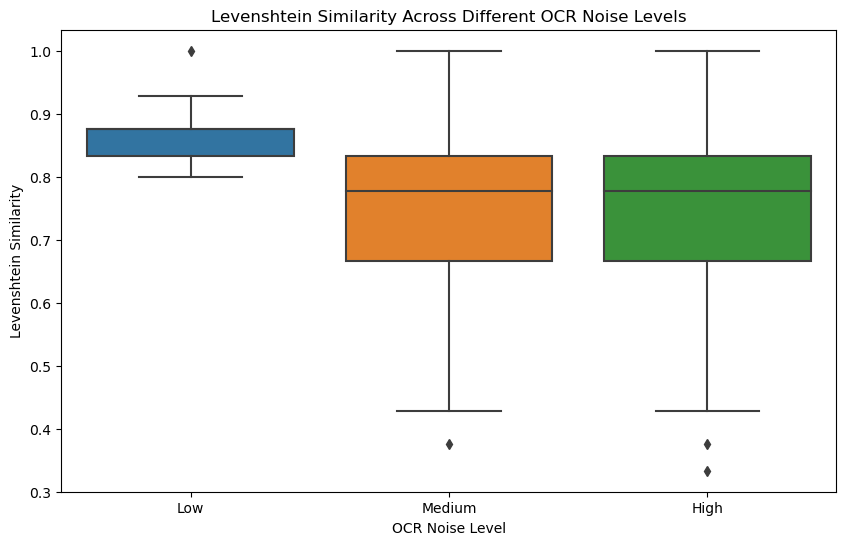

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='level', y='lev_similarity', data=df)
plt.title('Levenshtein Similarity Across Different OCR Noise Levels')
plt.xlabel('OCR Noise Level')
plt.ylabel('Levenshtein Similarity')
plt.show()

In [30]:
df.level.value_counts()

Low       137
Medium    137
High      137
Name: level, dtype: int64

In [31]:
df.to_csv('data/tokens_levels.csv', index=False)